In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson
import time

In [169]:
f = lambda x: x**-1.5
int_true = -2 * (5**(-1/2) - 1)
print('True value of integral:', int_true)

True value of integral: 1.1055728090000843


In [211]:
# from the definition of the trapezoid rule, one can see that every single
# f(x_i) will appear twice, once as a left endpoint and once as a right endpoint.
# Because of this, it will end up having the exact same form as the rectangle sum -
# with one key difference. The very first and last endpoints only appear once, so
# we have to subtract them off when we do this.
def trapezoid_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    h = x[1] - x[0]
    return h * (np.sum(f(x)) - 0.5*(f(a) + f(b)))

# scipy has a trapezoid rule implementation, so we can use it as a comparison
def scipy_trapezoid_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    return trapezoid(f(x), x=x)

In [212]:
# by carefully examining the sums, we see that the "2i" parts are equivalent
# to indexing every other value, which we do in python by [::2]. Otherwise,
# this is a pretty direct implementation of the rule.
def simpsons_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    fs = f(x)
    h = x[1] - x[0]

    term1 = f(a) + f(b)
    term2 = 4 * np.sum(fs[1:-1:2])
    term3 = 2 * np.sum(fs[2:-2:2])
    return h / 3 * (term1 + term2 + term3)

# Again, scipy has a simpsons rule implementation so we can compare with this
def scipy_simpsons_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    return simpson(f(x), x=x)

In [217]:
# Let's test out all of these integration methods for a variety of Ns
Ns = [6, 10, 50, 100, 500, 1000] 

# Set up empty arrays to store results
rect_results = np.zeros_like(Ns, dtype=float)
trap_results = np.zeros_like(Ns, dtype=float)
simp_results = np.zeros_like(Ns, dtype=float)
trap_scipy = np.zeros_like(Ns, dtype=float)
simp_scipy = np.zeros_like(Ns, dtype=float)

# Set up empty arrays to store timings for how long the integrations take
rect_times = np.zeros_like(Ns, dtype=float)
trap_times = np.zeros_like(Ns, dtype=float)
simp_times = np.zeros_like(Ns, dtype=float)
trap_scipy_times = np.zeros_like(Ns, dtype=float)
simp_scipy_times = np.zeros_like(Ns, dtype=float)

# Simple function to both perform the integration and time each method
def test_method(method, f, a, b, n):
    start_time = time.time()
    result = method(f, a, b, n)
    end_time = time.time()
    return result, end_time - start_time

# Loop through our Ns and test each method
for i, N in enumerate(Ns):
    rect_results[i], rect_times[i] = test_method(rectangle_rule, f, 1, 5, N)
    trap_results[i], trap_times[i] = test_method(trapezoid_rule, f, 1, 5, N)
    simp_results[i], simp_times[i] = test_method(simpsons_rule, f, 1, 5, N)
    trap_scipy[i], trap_scipy_times[i] = test_method(scipy_trapezoid_rule, f, 1, 5, N)
    simp_scipy[i], simp_scipy_times[i] = test_method(scipy_simpsons_rule, f, 1, 5, N)

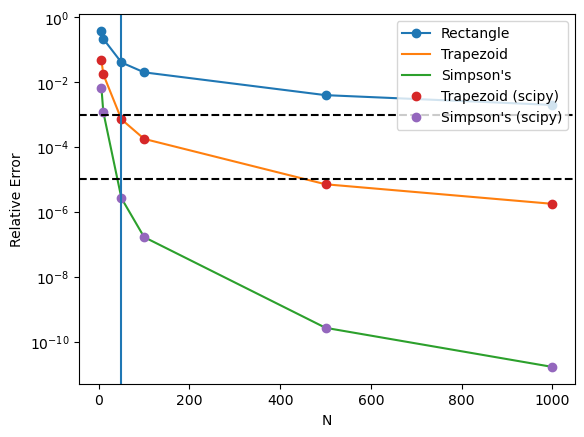

In [224]:
# Plot the relative error as a function of number of steps in the integration
plt.semilogy(Ns, np.abs(rect_results - int_true)/int_true, 'o-', label='Rectangle')
plt.semilogy(Ns, np.abs(trap_results - int_true)/int_true, label='Trapezoid')
plt.semilogy(Ns, np.abs(simp_results - int_true)/int_true, label='Simpson\'s')
plt.semilogy(Ns, np.abs(trap_scipy - int_true)/int_true, 'o', label='Trapezoid (scipy)')
plt.semilogy(Ns, np.abs(simp_scipy - int_true)/int_true, 'o', label='Simpson\'s (scipy)')
plt.axhline(1e-3, color='k', linestyle='--')
plt.axhline(1e-5, color='k', linestyle='--')
plt.axvline(50)
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend()

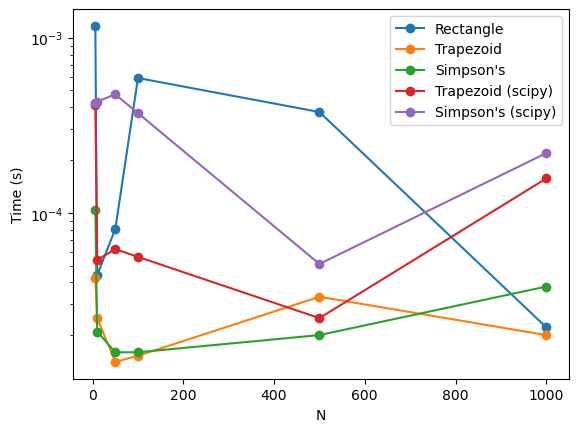

In [ ]:
# Plot the time taken for each method as a function of steps
plt.figure()
plt.semilogy(Ns, rect_times, 'o-', label='Rectangle')
plt.semilogy(Ns, trap_times, 'o-', label='Trapezoid')
plt.semilogy(Ns, simp_times, 'o-', label='Simpson\'s')
plt.semilogy(Ns, trap_scipy_times, 'o-', label='Trapezoid (scipy)')
plt.semilogy(Ns, simp_scipy_times, 'o-', label='Simpson\'s (scipy)')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.legend()

### Initial Observations
We can see that for the step sizes tested, Simpson's rule performs by far the best, as expected given its superior error properties. The Simpson's rule integration reaches a relative error of 1e-3 in only around N=10, and reaches 1e-5 by N=40 or so. Despite requiring barely more computational effort than the rectangular method, the trapezoidal rule also makes a fairly accurate calculation, reaching a relative error of 1e-3 and 1e-5 in about 50 and 500 steps, respectively. The especially poor performance of the rectangle method is likely a result of the exact functional form we have chosen - since this is a monotonically decreasing function within the range, the rectangle method will perform particularly poorly since it will always overestimate the area in each segment. Nonetheless, it's possible to get to sufficiently low error after a large enough number of steps. But to reach the desired relative errors, we'll have to check even larger step numbers.

It's nice to see that the results of the scipy methods are exactly in line with my custom functions.

One last note - clearly, the number of steps here is so low that the total time each operation takes is pretty much random. Hopepfully we can better investigate the time properties of the methods with larger steps as well.

In [225]:
# Repeat the previous steps but with larger values of N
Ns = [1000, 10000, 100000, 1000000, 10000000, 100000000]
rect_results = np.zeros_like(Ns, dtype=float)
trap_results = np.zeros_like(Ns, dtype=float)
simp_results = np.zeros_like(Ns, dtype=float)
trap_scipy = np.zeros_like(Ns, dtype=float)
simp_scipy = np.zeros_like(Ns, dtype=float)

rect_times = np.zeros_like(Ns, dtype=float)
trap_times = np.zeros_like(Ns, dtype=float)
simp_times = np.zeros_like(Ns, dtype=float)
trap_scipy_times = np.zeros_like(Ns, dtype=float)
simp_scipy_times = np.zeros_like(Ns, dtype=float)

def test_method(method, f, a, b, n):
    start_time = time.time()
    result = method(f, a, b, n)
    end_time = time.time()
    return result, end_time - start_time

for i, N in enumerate(Ns):
    rect_results[i], rect_times[i] = test_method(rectangle_rule, f, 1, 5, N)
    trap_results[i], trap_times[i] = test_method(trapezoid_rule, f, 1, 5, N)
    simp_results[i], simp_times[i] = test_method(simpsons_rule, f, 1, 5, N)
    trap_scipy[i], trap_scipy_times[i] = test_method(scipy_trapezoid_rule, f, 1, 5, N)
    simp_scipy[i], simp_scipy_times[i] = test_method(scipy_simpsons_rule, f, 1, 5, N)

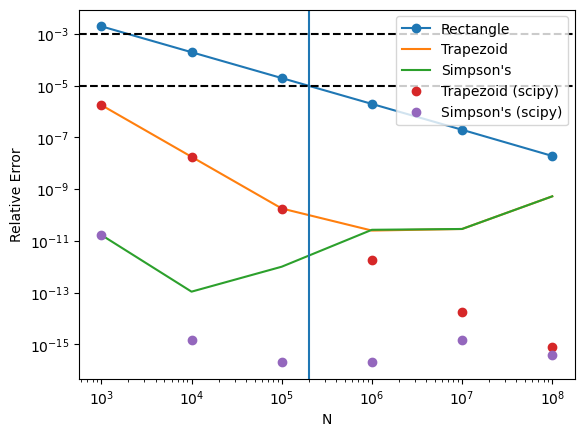

In [229]:
plt.loglog(Ns, np.abs(rect_results - int_true)/int_true, 'o-', label='Rectangle')
plt.loglog(Ns, np.abs(trap_results - int_true)/int_true, label='Trapezoid')
plt.loglog(Ns, np.abs(simp_results - int_true)/int_true, label='Simpson\'s')
plt.loglog(Ns, np.abs(trap_scipy - int_true)/int_true, 'o', label='Trapezoid (scipy)')
plt.loglog(Ns, np.abs(simp_scipy - int_true)/int_true, 'o', label='Simpson\'s (scipy)')
plt.axhline(1e-3, color='k', linestyle='--')
plt.axhline(1e-5, color='k', linestyle='--')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.axvline(2e5)
plt.legend()

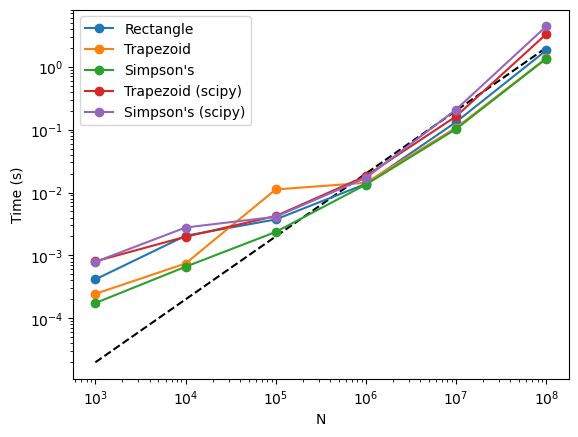

In [245]:
# plot the time taken for each method as a function of steps
plt.figure()
plt.loglog(Ns, rect_times, 'o-', label='Rectangle')
plt.loglog(Ns, trap_times, 'o-', label='Trapezoid')
plt.loglog(Ns, simp_times, 'o-', label='Simpson\'s')
plt.loglog(Ns, trap_scipy_times, 'o-', label='Trapezoid (scipy)')
plt.loglog(Ns, simp_scipy_times, 'o-', label='Simpson\'s (scipy)')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.legend()
plt.plot([1e3, 1e8], [2e-5, 2], 'k--', zorder=-1)

### New Observations
A few interesting things happen here! For one, we're finally able to check where the rectangle rule reaches the desired relative errors of 1e-3 and 1e-5 - at about 2000 and 200000 steps, respectively. Clearly, this is not the method to use in this case.

Interestingly, my trapezoid and Simpson's rule implementations start to break down. Their relative error flatlines (or maybe even gets worse) as the N increases at this point, whereas the scipy implementations continue to get better. This might be due to numerical errors. Python's default floats have a fixed precision, and truncation errors might start to add up as we get steps this fine. There may be other unoptimized features in my functions causing this behavior.

Finally, we can see the time behavior of my functions as well as the scipy ones. We can see a clear upward trend, with increasing N taking longer. I plotted a linear trend, which seems to roughly fit the end parts of the trend - however, there is a general "ramp up" from the lower N values to the higher ones. If this is a valid feature, then it might indicate that these methods scale a bit worse than linearly.

### Final Thoughts
Clearly, there is an obvious trade-off between accuracy and speed. There are limitations in these basic methods to how accurate your integration can get, and how quickly they can happen, so if you need a major speedup over these or especially a more accurate calculation, you may need to look at a method with different convergence properties. But in general, achieving higher accuracy requires sacrificing speed, and vice versa.